<a href="https://colab.research.google.com/github/mustankap/staccato/blob/main/staccato_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)


In [ ]:
dataset_url = "https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='actor', 
                                   extract=True)

In [ ]:
data_dir = pathlib.Path(data_dir)

In [ ]:
data_dir

PosixPath('/root/.keras/datasets/actor')

In [ ]:
dd = pathlib.Path("/root/.keras/datasets")
filenames=list(dd.glob('*/*.wav'))
count = len(filenames)
print(count)

2452


In [ ]:
filenames = tf.io.gfile.glob('/root/.keras/datasets/*/*.wav')
filenames = tf.random.shuffle(filenames)

len(filenames)

2452

In [ ]:
train_files = filenames[:800]
val_files = filenames[800: 900]
test_files = filenames[900:]


In [ ]:
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(audio_binary)
  return tf.squeeze(audio, axis=-1)


In [ ]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    print(parts)
    # Note: You'll use indexing here instead of tuple unpacking to enable this 
    # to work in a TensorFlow graph.
    return parts[-2]


In [ ]:
def get_waveform_and_label(file_path):
    label = get_label(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    return waveform, label


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
print(files_ds)
waveform_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)


<TensorSliceDataset shapes: (), types: tf.string>


InvalidArgumentError: ignored

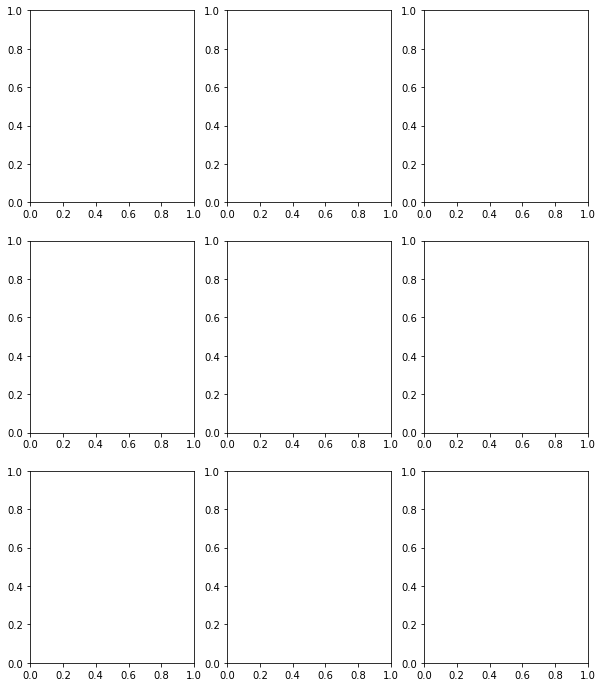

In [ ]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (audio, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode('utf-8')
    ax.set_title(label)

plt.show()